In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm
import scipy
import datetime as dt

In [ ]:
VEG_PATH="vegetation/data/"
COVID_PATH="covidoxford/data/"

# Analysis of NVDI across globe
The almost same pattern is observed in EVI 

In [ ]:
sc_df=pd.read_csv(VEG_PATH+"all_locations_1degx1deg_vegetation.csv")
sc_df["metric"].unique()

array(['CMG 0.05 Deg 16 days NDVI', 'CMG 0.05 Deg 16 days EVI'],
      dtype=object)

Select the rows for required metric

In [ ]:
metric_df=sc_df[(sc_df["metric"]=="CMG 0.05 Deg 16 days NDVI")&(sc_df["mean"]>-3000)&(~sc_df["mean"].isna())]

Analysis for for 1st and 2nd week of all months (12) for  year 2019 and 2020. Select mean for metric for those weeks with location as index. So week1_data and week2_data dictionaries are made with key as location and value as mean of metric. We are taking data from week1_data and week2_data for locations which are present in both dictionaries across the globe. <br><br>
There will be 24 points as we are taking the mean over all locations. So each point represents NDVI for that week over all locations across globe. And 2 weeks per month for vegetaion data hence 24 points. List x stores week numbers, list values1 store 24 mean values of 2019 and list values2 store mean values of 2020.

In [ ]:
x=[]
values1=[]
values2=[]
for month in range(1,13):
    for week in range(1,3):
        week1=str(month)+".2019.week"+str(week)
        week2=str(month)+".2020.week"+str(week)
        week1_data=metric_df[metric_df["week"]==week1].set_index("location")["mean"].to_dict()
        week2_data=metric_df[metric_df["week"]==week2].set_index("location")["mean"].to_dict()
        temp1=[]
        temp2=[]
        for location in week1_data:
            if location in week2_data:
                temp1.append(week1_data[location])
                temp2.append(week2_data[location])
        if len(temp1)>=100:
            x.append((month-1)*2+week)
            values1.append(np.mean(temp1))
            values2.append(np.mean(temp2))
            print(" month =",month," week =",week,"2019 =",values1[-1],"2020 =",values2[-1])

 month = 1  week = 1 2019 = 3051.2960754766427 2020 = 3106.2962720304004
 month = 1  week = 2 2019 = 2812.7750431778927 2020 = 2899.036022699235
 month = 2  week = 1 2019 = 2644.949161305147 2020 = 2730.735523897059
 month = 2  week = 2 2019 = 2578.888706320517 2020 = 2685.3621973929235
 month = 3  week = 1 2019 = 2572.421100330526 2020 = 2681.2283825567756
 month = 3  week = 2 2019 = 2691.9478339638727 2020 = 2777.520701230884
 month = 4  week = 1 2019 = 2883.150892143808 2020 = 2898.3541411451397
 month = 4  week = 2 2019 = 3112.456807887024 2020 = 3141.6410871302955
 month = 5  week = 1 2019 = 3501.24586842947 2020 = 3512.3058961509755
 month = 5  week = 2 2019 = 3997.3660680982575 2020 = 4005.4850535514465
 month = 6  week = 1 2019 = 4459.78921281245 2020 = 4454.791984224271
 month = 6  week = 2 2019 = 4776.574979994665 2020 = 4827.0570818885035
 month = 8  week = 1 2019 = 4928.874019529374 2020 = 5003.530761432154
 month = 8  week = 2 2019 = 4847.943425402581 2020 = 4931.487362695

Plot the curve of NDVI. We can see there is not much difference between 2019 and 2020. Vegetation metric depends on a lot of factor. We should not study this isolation. Example, man-made forest fires or agricultural things tale place at different time all over the world. Additionally rainfall over the previous years. or particularly for 2019 and 2020 were different. There is a little different in 2020 vegetation for week 5 and for week 15 but this difference can be due to other things too not only the lockdown thing. Obivously, lockdown had helped but it should be studied with additional parameters. We should not expect change in vegetation rapidly. It takes time.

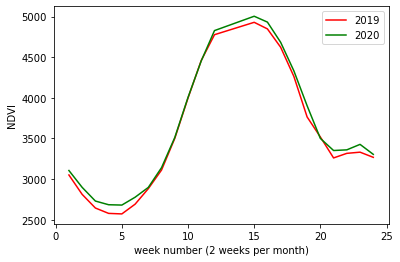

In [ ]:
plt.plot(x,values1,label="2019",color="red")
plt.plot(x,values2,label="2020",color="green")
plt.legend()
plt.xlabel("week number (2 weeks per month)")
plt.ylabel("NDVI")
plt.show()